In [1]:
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [22]:
##Librerías

import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score
import Funciones2 as funciones
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables

import joblib  ### para guardar modelos
import openpyxl


In [8]:
df2015 = pd.read_csv('https://raw.githubusercontent.com/veronica1908/RH_Entrega1/main/dfdataN.csv', sep=',')
df2015

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,DateSurvey,JobInvolvement,PerformanceRating,SurveyDate,Attrition,retirementDate,retirementType,resignationReason
0,51.0,Travel_Rarely,Sales,6.0,2,Life Sciences,1,1,Female,1,...,4.0,2.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,Others
1,31.0,Travel_Frequently,Research & Development,10.0,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2016-12-31,2,4,2016-12-31,Yes,2016-10-15,Resignation,Others
2,32.0,Travel_Frequently,Research & Development,17.0,4,Other,1,3,Male,4,...,2.0,1.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,Others
3,38.0,Non-Travel,Research & Development,2.0,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2016-12-31,2,3,2016-12-31,NaN,NaN,NaN,Others
4,32.0,Travel_Rarely,Research & Development,10.0,1,Medical,1,5,Male,1,...,1.0,3.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,29.0,Travel_Rarely,Sales,4.0,3,Other,1,4405,Female,2,...,4.0,3.0,2016-12-31,2,3,2016-12-31,NaN,NaN,NaN,Others
4296,42.0,Travel_Rarely,Research & Development,5.0,4,Medical,1,4406,Female,1,...,1.0,3.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,Others
4297,29.0,Travel_Rarely,Research & Development,2.0,4,Medical,1,4407,Male,1,...,4.0,3.0,2016-12-31,2,3,2016-12-31,NaN,NaN,NaN,Others
4298,25.0,Travel_Rarely,Research & Development,25.0,2,Life Sciences,1,4408,Male,2,...,3.0,3.0,2016-12-31,3,4,2016-12-31,NaN,NaN,NaN,Others


In [9]:
# llenar nulos de la variable respuesta
condicion = (df2015['retirementType'] == 'fired') | (pd.isnull(df2015['retirementType']))
df2015.loc[condicion, 'Attrition'] = 'No'

In [10]:
# eliminar variables que no se necesitan
df2015 = df2015.drop(['EmployeeID','retirementType','resignationReason','retirementDate','DateSurvey','SurveyDate','Over18','InfoDate'], axis=1)
     

In [11]:
#Observar s existen nulos
df2015.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
Attrition                  0
dtype: int64

Dummies

In [12]:
df_dummies = df2015.copy()

In [14]:

# Identificar las columnas categóricas
cat_2015 = df_dummies.select_dtypes(include=['object']).columns

# Iterar a través de las columnas categóricas y mostrar las categorías únicas
for column in cat_2015:
    unique_categories = df_dummies[column].unique()
    print(f'Categorías en "{column}": {unique_categories}')

Categorías en "BusinessTravel": ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categorías en "Department": ['Sales' 'Research & Development' 'Human Resources']
Categorías en "EducationField": ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categorías en "Gender": ['Female' 'Male']
Categorías en "JobRole": ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Categorías en "MaritalStatus": ['Married' 'Single' 'Divorced']
Categorías en "Attrition": ['No' 'Yes']


In [15]:
list_dummies = cat_2015.difference(['Gender', 'Attrition','retirementDate','DateSurvey','SurveyDate','Over18','InfoDate'])
list_dummies

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [16]:
# 2015
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_2015:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_2015 = pd.get_dummies(df_dummies)

In [17]:
df_dummies_2015

,Age,DistanceFromHome,Education,EmployeeCount,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51.0,6.0,2,1,0,1,131160.0,1.0,11.0,8,...,False,False,False,False,False,False,False,False,True,False
1,31.0,10.0,1,1,0,1,41890.0,0.0,23.0,8,...,False,False,False,False,True,False,False,False,False,True
2,32.0,17.0,4,1,1,4,193280.0,1.0,15.0,8,...,False,False,False,False,False,True,False,False,True,False
3,38.0,2.0,5,1,1,3,83210.0,3.0,11.0,8,...,False,False,False,False,False,False,False,False,True,False
4,32.0,10.0,1,1,1,1,23420.0,4.0,12.0,8,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,29.0,4.0,3,1,0,2,35390.0,1.0,18.0,8,...,False,False,False,False,False,False,False,False,False,True
4296,42.0,5.0,4,1,0,1,60290.0,3.0,17.0,8,...,False,False,False,False,True,False,False,False,False,True
4297,29.0,2.0,4,1,1,1,26790.0,2.0,15.0,8,...,True,False,False,False,False,False,False,True,False,False
4298,25.0,25.0,2,1,1,2,37020.0,0.0,20.0,8,...,False,False,False,False,False,True,False,False,True,False


Escalado y/o estandarización de los datos

In [19]:

######## con base en los modelos candidatos se realizará una selección de variables ########
y = df_dummies_2015['Attrition']
X1 = df_dummies_2015.loc[:, ~df_dummies_2015.columns.isin(['Attrition'])]
scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

Árbol de decisión

|--- TotalWorkingYears <= -1.26
|   |--- BusinessTravel_Travel_Frequently <= 0.80
|   |   |--- Age <= -1.14
|   |   |   |--- class: 1
|   |   |--- Age >  -1.14
|   |   |   |--- class: 0
|   |--- BusinessTravel_Travel_Frequently >  0.80
|   |   |--- Age <= -0.27
|   |   |   |--- class: 1
|   |   |--- Age >  -0.27
|   |   |   |--- class: 0
|--- TotalWorkingYears >  -1.26
|   |--- MaritalStatus_Single <= 0.38
|   |   |--- NumCompaniesWorked <= 0.73
|   |   |   |--- class: 0
|   |   |--- NumCompaniesWorked >  0.73
|   |   |   |--- class: 0
|   |--- MaritalStatus_Single >  0.38
|   |   |--- Age <= -0.37
|   |   |   |--- class: 0
|   |   |--- Age >  -0.37
|   |   |   |--- class: 0



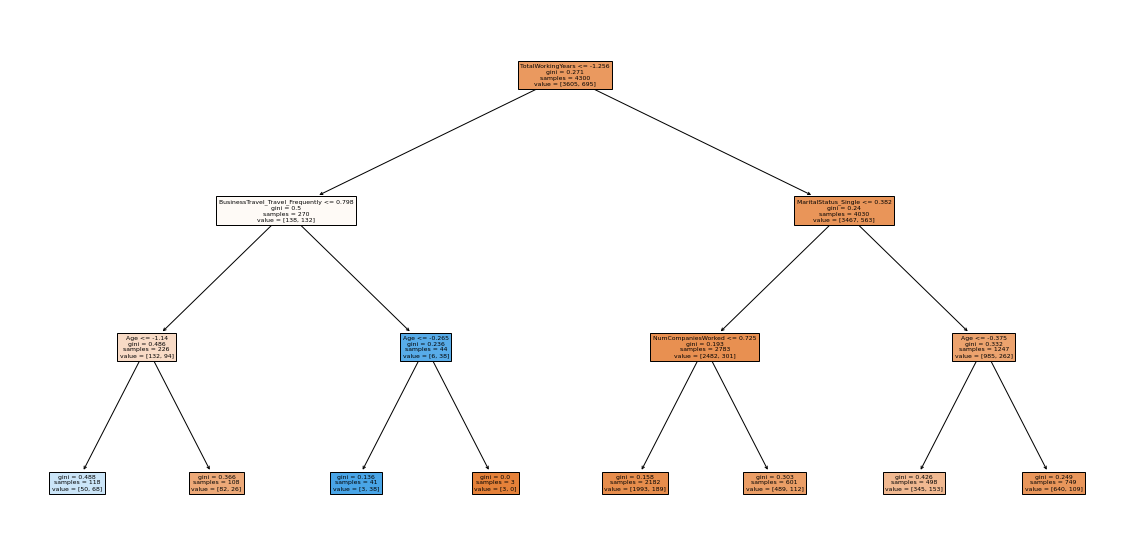

In [20]:
# Crear y entrenar el modelo de árbol de decisión
rtree = DecisionTreeClassifier(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

Modelos candidatos

In [21]:

# Define los modelos seleccionados
m_logreg = LogisticRegression()
m_tree = DecisionTreeClassifier()
m_rf = RandomForestClassifier()
m_gbt = GradientBoostingClassifier()

# Lista de modelos seleccionados
modelos=list([m_logreg,m_tree, m_rf, m_gbt])
     

Selección de variables

In [23]:
# Ahora, utiliza estos modelos para seleccionar las variables
var_names = funciones.sel_variables(modelos, X, y, threshold="2*mean")
X2=X[var_names] ### matriz con variables sele ccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               4300 non-null   float64
 1   BusinessTravel_Travel_Frequently  4300 non-null   float64
 2   DistanceFromHome                  4300 non-null   float64
 3   Education                         4300 non-null   float64
 4   EnvironmentSatisfaction           4300 non-null   float64
 5   JobSatisfaction                   4300 non-null   float64
 6   MaritalStatus_Single              4300 non-null   float64
 7   MonthlyIncome                     4300 non-null   float64
 8   NumCompaniesWorked                4300 non-null   float64
 9   PercentSalaryHike                 4300 non-null   float64
 10  TotalWorkingYears                 4300 non-null   float64
 11  YearsAtCompany                    4300 non-null   float64
 12  YearsS

Definir modelo ganador

In [24]:
# Calcular AUC-ROC para todos los modelos con todas las variables
f1score_df = funciones.medir_modelos(modelos, "f1", X, y, 30)
# Calcular AUC-ROC para todos los modelos con variables seleccionadas
f1_score_varsel = funciones.medir_modelos(modelos, "f1", X2, y, 30)

In [25]:
f1=pd.concat([f1score_df,f1_score_varsel],axis=1)
f1.columns=['rl', 'dt', 'rf', 'gb', 'rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']
f1

,rl,dt,rf,gb,rl_Sel,dt_sel,rf_sel,gb_Sel
0,0.322581,1.000000,1.000000,0.571429,0.222222,1.000000,1.000000,0.647059
1,0.413793,1.000000,1.000000,0.611111,0.357143,1.000000,1.000000,0.611111
2,0.076923,1.000000,1.000000,0.529412,0.153846,1.000000,1.000000,0.451613
3,0.266667,1.000000,1.000000,0.466667,0.357143,1.000000,1.000000,0.562500
4,0.222222,1.000000,1.000000,0.466667,0.160000,1.000000,1.000000,0.484848
5,0.187500,1.000000,1.000000,0.571429,0.333333,1.000000,1.000000,0.545455
6,0.333333,1.000000,1.000000,0.500000,0.137931,1.000000,1.000000,0.545455
7,0.275862,1.000000,1.000000,0.451613,0.222222,1.000000,1.000000,0.500000
8,0.133333,1.000000,1.000000,0.333333,0.000000,1.000000,1.000000,0.275862
9,0.258065,1.000000,1.000000,0.344828,0.137931,1.000000,1.000000,0.387097


<Axes: >

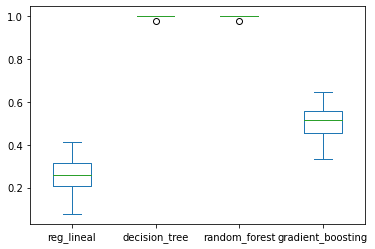

In [26]:
f1score_df.plot(kind='box') #### gráfico para modelos todas las variables

<Axes: >

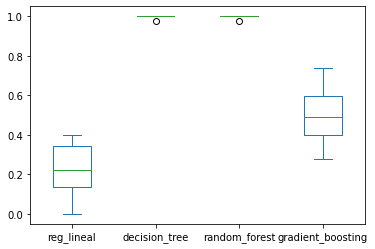

In [27]:
f1_score_varsel.plot(kind='box') ### gráfico para modelo variables seleccionadas

<Axes: >

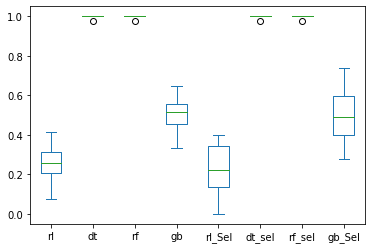

In [28]:
f1.plot(kind='box') ### gráfico para modelos sel y todas las variables

In [29]:
f1.mean()

rl        0.255266
dt        0.999259
rf        0.999259
gb        0.497773
rl_Sel    0.208784
dt_sel    0.999259
rf_sel    0.999259
gb_Sel    0.487854
dtype: float64


Dado el contexto de abordar una problemática de clasificación caracterizada por un desequilibrio en las clases y tomando en cuenta los desafíos empresariales asociados con la alta tasa de salidas de empleados, se plantea la necesidad de un modelo capaz de armonizar la precisión y la exhaustividad en la predicción de estas salidas. Tanto los modelos de Random Forest como los de Decision Tree han emergido como alternativas efectivas en este escenario, al ofrecer un equilibrio óptimo entre precisión y exhaustividad, lo cual se refleja en sus destacados puntajes de F1 score.

Asimismo, se contempla el modelo con variables seleccionadas debido a su desempeño equiparable al del modelo que considera todas las variables. Esta estrategia permite simplificar la estructura del modelo y reducir el costo computacional sin menoscabar de manera significativa la capacidad predictiva. Al tener como meta identificar las variables más influyentes en la tasa de salidas y prever con exactitud las salidas de los empleados, este enfoque se presenta como una solución eficaz y eficiente para atender los desafíos empresariales planteados.

Por último, se procederá a entrenar el modelo Random Forest con las variables seleccionadas, cerrando así el ciclo de acción previsto

Afinamiento de hiperparámetros

In [31]:
# Grilla de hiperparametros para el modelo Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Criterios para la división de nodos
    'max_depth': [5, 10, 15],     # Profundidad máxima del árbol
    'min_samples_split': [5, 20, 100 ],    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],      # Número mínimo de muestras requeridas en un nodo hoja
    'max_features': [5, 20],  # Número máximo de características a considerar en cada división
    'class_weight': [None, 'balanced']  # Peso de las clases para abordar el desbalance de clases
}

In [33]:
# Grilla de hiperparametros para el modelo Ramdon Forest
param_grid_rf = {
    'n_estimators': [5, 50, 100, 200, 500],  # Número de árboles en el bosque
    'max_features': [5, 20],  # Número de características a considerar en cada división
    'max_depth': [10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [5, 20, 100],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para estar en un nodo hoja
    'bootstrap': [True, False]  # Método de muestreo para construir árboles
}
     

In [34]:
# Crear la instancia de GridSearchCV para búsqueda de hiperparámetros
tun_dt = GridSearchCV(m_tree, param_grid=param_grid_dt, scoring='f1', cv=5)
# Realizar la búsqueda de hiperparámetros en los datos
tun_dt.fit(X2, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'max_features': [5, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 20, 100]},
             scoring='f1')

In [35]:
pd.set_option('display.max_colwidth', 100)
resultados=tun_dt.cv_results_
tun_dt.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)
     

,params,mean_test_score
153,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samp...",0.952162
45,"{'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samples_le...",0.949640
156,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samp...",0.944276
48,"{'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samples_le...",0.935311
207,"{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 20, 'min_s...",0.935273
...,...,...
61,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.319693
55,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.312075
59,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.303243
8,"{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf...",0.298068


In [36]:
# Técnica de búsqueda de hiperparámetros
tun_rf = RandomizedSearchCV(m_rf,param_distributions=param_grid_rf,n_iter=6,scoring="f1")
tun_rf.fit(X2,y)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=6,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': [5, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 20, 100],
                                        'n_estimators': [5, 50, 100, 200, 500]},
                   scoring='f1')

In [37]:
pd.set_option('display.max_colwidth', 100)
resultados=tun_rf.cv_results_
tun_rf.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
1,"{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 5, 'max_dep...",0.999278
0,"{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 5, 'max_dep...",0.992010
5,"{'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 5, 'max_de...",0.739953
3,"{'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 20, 'max_d...",0.678509
2,"{'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 20, 'max_d...",0.657457
4,"{'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 20, 'max_de...",0.619202


In [38]:
# Mejor grilla del modelo Decision Tree
dt_final = tun_dt.best_estimator_

In [39]:
# Guardar el modelo con hyperparameter tunning
rf_final = tun_rf.best_estimator_
     

Analisis del los modelos Decision Tree y Ramdon Forest

In [40]:
#####Evaluar métrica de entrenamiento y evaluación para mirar sobre ajuste ####
eval_dt=cross_validate(dt_final,X2,y,cv=30,scoring="f1",return_train_score=True)
eval_rf=cross_validate(rf_final,X2,y,cv=30,scoring="f1",return_train_score=True)

In [41]:
#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para Desicion Tree
train_dt=pd.DataFrame(eval_dt['train_score'])
test_dt=pd.DataFrame(eval_dt['test_score'])
train_test_dt=pd.concat([train_dt, test_dt],axis=1)
train_test_dt.columns=['train_score','test_score']
train_test_dt

,train_score,test_score
0,0.954351,0.938776
1,0.978166,1.000000
2,0.939776,0.880000
3,0.988962,1.000000
4,0.979502,0.958333
5,0.978848,0.941176
6,0.978134,1.000000
7,0.944915,0.938776
8,0.959140,0.938776
9,0.945402,0.958333


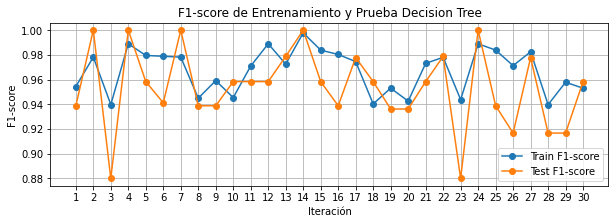

In [42]:

# Número de iteraciones
iterations = range(1, len(train_test_dt) + 1)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_dt['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_dt['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Prueba Decision Tree')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

In [43]:
train_test_dt["test_score"].mean()

0.9532354492624474

Analizar este valor con el anterior, porque parece que es menor ? aunque el incial si esta bastante alto.

In [44]:
#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para Ramdon Forest
train_rf=pd.DataFrame(eval_rf['train_score'])
test_rf=pd.DataFrame(eval_rf['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']
train_test_rf

,train_score,test_score
0,1.0,1.000000
1,1.0,1.000000
2,1.0,1.000000
3,1.0,1.000000
4,1.0,1.000000
5,1.0,1.000000
6,1.0,1.000000
7,1.0,1.000000
8,1.0,1.000000
9,1.0,1.000000


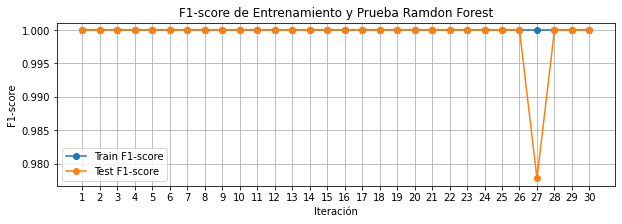

In [45]:
# Número de iteraciones
iterations = range(1, len(train_test_rf) + 1)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_rf['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_rf['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Prueba Ramdon Forest')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

In [46]:
train_test_rf["test_score"].mean()

0.9992592592592593

Aunque el modelo Decision Tree tiene menor sobre ajuste y mayor desempeño que el modelo Ramdon Forest, se podria creer que es el mejor modelo, sin embargo, # Aun se deben revisar los valores porque estan dando bastante cercanos antes y despues de entrenar incluso antes estan dando bastante altos.

Matriz de confusión

In [47]:
# separar datos de train y test
x_train,x_test,y_train,y_test = train_test_split(X2,y,shuffle = True,test_size=0.30, random_state=123)

In [48]:
y_pred_train_dt = dt_final.predict(x_train) # guardar la predicción para train
y_pred_test_dt = dt_final.predict(x_test) # guardar la predicción para test

[[1067    6]
 [   1  216]]


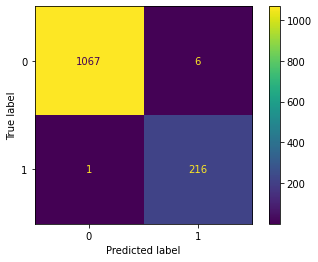

In [49]:
# Matriz de confusión:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=dt_final.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_final.classes_)
disp.plot();
print(cm)

In [50]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f"Accuracy test: {accuracy_score(y_test, y_pred_test_dt)}")
print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion (Sensibilidad)): {TP/(TP+FN)}')
print(f'F1-score:', f1_score(y_test, y_pred_test_dt, average='binary'))
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy test: 0.9945736434108527
Precicion: 0.9990636704119851
Recuperacion (Sensibilidad)): 0.994408201304753
F1-score: 0.9840546697038726
Especificidad: 0.9953917050691244


In [ ]:
### función para exportar y guardar objetos de python (cualqueira)
